<h1 style="text-align:center;">Laboratorio 6</h1>
<h4 style="text-align:center;">Cristopher Barrios</h4>
<h4 style="text-align:center;">Mariana David</h4>
<h5 style="text-align:center;">8/9/2023</h5>

## Pips

## Librerias

In [3]:
# Importaciones
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

1. Descargue los archivos de datos 
2. Cargue los archivos de datos a R o a Python. 


In [4]:
#Mandar a llamar la data 

# Cargar el conjunto de datos CSV en un DataFrame
dataArevalo = pd.read_csv('bernardoArevalo.csv')
dataSandra = pd.read_csv('sandraTorres.csv')
dataTrafico = pd.read_csv('traficogt.csv')

# Mostrar las primeras filas del DataFrame
print(dataArevalo.head())
print(dataSandra.head())
print(dataTrafico.head())

   Unnamed: 0                   id               id_str  \
0           0  1702109621899407575  1702109621899407575   
1           1  1702109505947865192  1702109505947865192   
2           2  1701995859229958189  1701995859229958189   
3           3  1702109134387134664  1702109134387134664   
4           4  1702108943495926143  1702108943495926143   

                                                 url  \
0  https://twitter.com/eltuitdehoy_/status/170210...   
1  https://twitter.com/totitafuentes/status/17021...   
2  https://twitter.com/DrDavidCabrera/status/1701...   
3  https://twitter.com/Fernand0483/status/1702109...   
4  https://twitter.com/MaxTiger502/status/1702108...   

                        date  \
0  2023-09-13 23:58:52+00:00   
1  2023-09-13 23:58:24+00:00   
2  2023-09-13 16:26:49+00:00   
3  2023-09-13 23:56:55+00:00   
4  2023-09-13 23:56:10+00:00   

                                                user lang  \
0  {'id': 46561608, 'id_str': '46561608', 'url': ...  

Manejo de data de Arevalo

In [5]:
# Contar la cantidad de filas y columnas
num_filas, num_columnas = dataArevalo.shape
print(f"El conjunto de datos tiene {num_filas} filas y {num_columnas} columnas")

# Obtener estadísticas descriptivas
print(dataArevalo.describe())

# Filtrar datos -> seleccionamos solo las filas donde el número de retweets es mayor que 10
retweets_mayores_a_10 = dataArevalo[dataArevalo['retweetCount'] > 10]
print(retweets_mayores_a_10)
# Guardar el DataFrame modificado
retweets_mayores_a_10.to_csv('retweetsArevalo_mayores_a_10.csv', index=False)


El conjunto de datos tiene 4212 filas y 29 columnas
        Unnamed: 0            id        id_str   replyCount  retweetCount  \
count  4212.000000  4.212000e+03  4.212000e+03  4212.000000   4212.000000   
mean   2105.500000  1.688657e+18  1.688657e+18    28.675214     53.502137   
std    1216.043996  2.757520e+16  2.757520e+16   283.795014    451.659694   
min       0.000000  1.399690e+18  1.399690e+18     0.000000      0.000000   
25%    1052.750000  1.695128e+18  1.695128e+18     0.000000      0.000000   
50%    2105.500000  1.701776e+18  1.701776e+18     0.000000      0.000000   
75%    3158.250000  1.701997e+18  1.701997e+18     1.000000      1.000000   
max    4211.000000  1.702343e+18  1.702343e+18  8609.000000  13093.000000   

          likeCount   quoteCount  conversationId     viewCount  coordinates  \
count   4212.000000  4212.000000    4.212000e+03  4.135000e+03          0.0   
mean     256.966999     5.504036    1.688584e+18  4.613934e+05          NaN   
std     2267.5658

Manejo de data de Santra

In [6]:
# Contar la cantidad de filas y columnas
num_filas, num_columnas = dataSandra.shape
print(f"El conjunto de datos tiene {num_filas} filas y {num_columnas} columnas")

# Obtener estadísticas descriptivas
print(dataSandra.describe())

# Filtrar datos --> seleccionando solo las filas donde el número de retweets es mayor que 10
retweets_mayores_a_10 = dataSandra[dataSandra['retweetCount'] > 10]
print(retweets_mayores_a_10)
# Guardar el DataFrame modificado
retweets_mayores_a_10.to_csv('retweetsSandra_mayores_a_10.csv', index=False)


El conjunto de datos tiene 5784 filas y 29 columnas
       Unnamed: 0            id        id_str   replyCount  retweetCount  \
count  5784.00000  5.784000e+03  5.784000e+03  5784.000000   5784.000000   
mean   2891.50000  1.674210e+18  1.674210e+18    19.563797     38.411307   
std    1669.84131  5.087331e+16  5.087331e+16   203.854820    341.966503   
min       0.00000  1.412381e+18  1.412381e+18     0.000000      0.000000   
25%    1445.75000  1.677316e+18  1.677316e+18     0.000000      0.000000   
50%    2891.50000  1.701370e+18  1.701370e+18     0.000000      0.000000   
75%    4337.25000  1.701763e+18  1.701763e+18     1.000000      1.000000   
max    5783.00000  1.702375e+18  1.702375e+18  8610.000000  13099.000000   

          likeCount   quoteCount  conversationId     viewCount  coordinates  \
count   5784.000000  5784.000000    5.784000e+03  4.962000e+03          0.0   
mean     185.464039     5.127766    1.674125e+18  3.034927e+05          NaN   
std     1910.616422    50.

Manejo de data de Tráfico 

In [7]:
# Contar la cantidad de filas y columnas
num_filas, num_columnas = dataTrafico.shape
print(f"El conjunto de datos tiene {num_filas} filas y {num_columnas} columnas")

# Obtener estadísticas descriptivas
print(dataTrafico.describe())

# Filtrar datos ---> seleccionamos solo las filas donde el número de retweets es mayor que 10
retweets_mayores_a_10 = dataTrafico[dataTrafico['retweetCount'] > 10]
print(retweets_mayores_a_10)

# Guardar el DataFrame modificado en un nuevo archivo CSV
retweets_mayores_a_10.to_csv('retweetsTrafico_mayores_a_10.csv', index=False)


El conjunto de datos tiene 12631 filas y 29 columnas
        Unnamed: 0            id        id_str    replyCount  retweetCount  \
count  12631.00000  1.263100e+04  1.263100e+04  12631.000000  12631.000000   
mean    6315.00000  1.541871e+18  1.541871e+18     19.145594     40.664476   
std     3646.39996  2.016253e+17  2.016253e+17    217.571265    473.150980   
min        0.00000  2.837328e+17  2.837328e+17      0.000000      0.000000   
25%     3157.50000  1.353746e+18  1.353746e+18      0.000000      0.000000   
50%     6315.00000  1.693984e+18  1.693984e+18      0.000000      0.000000   
75%     9472.50000  1.700314e+18  1.700314e+18      1.000000      2.000000   
max    12630.00000  1.702402e+18  1.702402e+18   8611.000000  27061.000000   

           likeCount    quoteCount  conversationId     viewCount  \
count   12631.000000  12631.000000    1.263100e+04  7.237000e+03   
mean      266.560367      4.916871    1.541730e+18  4.312334e+05   
std      4429.581781     65.131717    2.

3. Limpie y preprocese los datos. Describa de forma detallada las actividades de preprocesamiento 
que llevó a cabo. 

3.1. Se pueden hacer tareas como: 


In [8]:
# Descargar los recursos necesarios de NLTK (stopwords y tokenizador)
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mariana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mariana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


- Convertir el texto a mayúsculas o a minúsculas 
- Quitar los caracteres especiales que aparecen como “#”,”@” o los apóstrofes. 
- Quitar las url 
- Revisar si hay emoticones y quitarlos, ¿conviene quitarlos para este ejercicio? 
- Quitar los signos de puntuación 
- Quitar los artículos, preposiciones y conjunciones (stopwords) 
- Quitar números si considera que interferirán en los análisis. 






----------------- Arevalo---------------------------

In [9]:
# Verificar los nombres de las columnas del DataFrame de arévalo
print(dataArevalo.columns)


Index(['Unnamed: 0', 'id', 'id_str', 'url', 'date', 'user', 'lang',
       'rawContent', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'hashtags', 'cashtags', 'mentionedUsers', 'links',
       'viewCount', 'retweetedTweet', 'quotedTweet', 'place', 'coordinates',
       'inReplyToTweetId', 'inReplyToUser', 'source', 'sourceUrl',
       'sourceLabel', 'media', '_type'],
      dtype='object')


In [10]:
# Función para preprocesar el texto en la columna 'rawContent'
def preprocess_textA(textA):
    # Convertir el texto a minúsculas
    textA = textA.lower()
    
    # Quitar caracteres especiales, URLs, y apóstrofes
    textA = re.sub(r'[@#\'\(\)\[\]\{\}<>/\\]', ' ', textA)
    textA = re.sub(r'http\S+|www\S+', '', textA)
    
    # Quitar emoticones (esto es opcional, depende de tus necesidades)
    textA = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', '', textA)
    
    # Quitar signos de puntuación
    textA = re.sub(r'[^\w\s]', '', textA)
    
    # Tokenizar el texto en palabras
    words = word_tokenize(textA)
    
    # Quitar palabras de parada (stopwords)
    stop_words = set(stopwords.words('spanish'))  # Puedes cambiar 'spanish' por otro idioma si es necesario
    words = [word for word in words if word not in stop_words]
    
    # Quitar números
    words = [word for word in words if not word.isdigit()]
    
    # Unir las palabras preprocesadas en un solo texto
    preprocessed_textA = ' '.join(words)
    
    return preprocessed_textA

# Aplicar la función de preprocesamiento a la columna 'rawContent'
dataArevalo['textA_preprocesado'] = dataArevalo['rawContent'].apply(preprocess_textA)

# Mostrar las primeras filas del DataFrame con el texto preprocesado
print(dataArevalo[['rawContent', 'textA_preprocesado']].head())


                                          rawContent  \
0  @AnonGTReloaded @msemillagt @BArevalodeLeon ja...   
1  @ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Do...   
2  Paciente de 39 años, dolor lumbar de 1 año tra...   
3  @VicZacariasGT @soy_502 @BArevalodeLeon @msemi...   
4  @Igor_Bitkov No le sigan el juego a este ruso ...   

                                  textA_preprocesado  
0  anongtreloaded msemillagt barevalodeleon jajaj...  
1  asiervera aztecanoticiagt barevalodeleon dos v...  
2  paciente años dolor lumbar año tras caída hizo...  
3  viczacariasgt soy_502 barevalodeleon msemillag...  
4  igor_bitkov sigan juego ruso invasor enero sol...  


----------------- Sandra -----------------------

In [11]:
# Verificar los nombres de las columnas del DataFrame de Sandra
print(dataSandra.columns)


Index(['Unnamed: 0', 'id', 'id_str', 'url', 'date', 'user', 'lang',
       'rawContent', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'hashtags', 'cashtags', 'mentionedUsers', 'links',
       'viewCount', 'retweetedTweet', 'quotedTweet', 'place', 'coordinates',
       'inReplyToTweetId', 'inReplyToUser', 'source', 'sourceUrl',
       'sourceLabel', 'media', '_type'],
      dtype='object')


In [12]:
# Función para preprocesar el texto en la columna 'rawContent'
def preprocess_textS(textS):
    # Convertir el texto a minúsculas
    textS = textS.lower()
    
    # Quitar caracteres especiales, URLs, y apóstrofes
    textS = re.sub(r'[@#\'\(\)\[\]\{\}<>/\\]', ' ', textS)
    textS = re.sub(r'http\S+|www\S+', '', textS)
    
    # Quitar emoticones (esto es opcional, depende de tus necesidades)
    textS = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', '', textS)
    
    # Quitar signos de puntuación
    textS = re.sub(r'[^\w\s]', '', textS)
    
    # Tokenizar el texto en palabras
    words = word_tokenize(textS)
    
    # Quitar palabras de parada (stopwords)
    stop_words = set(stopwords.words('spanish'))  # Puedes cambiar 'spanish' por otro idioma si es necesario
    words = [word for word in words if word not in stop_words]
    
    # Quitar números
    words = [word for word in words if not word.isdigit()]
    
    # Unir las palabras preprocesadas en un solo texto
    preprocessed_textS = ' '.join(words)
    
    return preprocessed_textS

# Aplicar la función de preprocesamiento a la columna 'rawContent'
dataSandra['textS_preprocesado'] = dataSandra['rawContent'].apply(preprocess_textS)

# Mostrar las primeras filas del DataFrame con el texto preprocesado
print(dataSandra[['rawContent', 'textS_preprocesado']].head())


                                          rawContent  \
0  @bernardosilvagt @BArevalodeLeon @DrGiammattei...   
1  @_awskl @mjcabrerar @BArevalodeLeon @TSEGuatem...   
2  The 2023 National Race Walking Championship &a...   
3  @Palomin17772524 @mjcabrerar @BArevalodeLeon @...   
4  @ASolaresM @Mike051270 @BArevalodeLeon Otro es...   

                                  textS_preprocesado  
0  bernardosilvagt barevalodeleon drgiammattei me...  
1  _awskl mjcabrerar barevalodeleon tseguatemala ...  
2  the national race walking championship amp you...  
3  palomin17772524 mjcabrerar barevalodeleon tseg...  
4  asolaresm mike051270 barevalodeleon estupido c...  


------ Trafico ------------

In [13]:
# Verificar los nombres de las columnas del DataFrame de Sandra
print(dataTrafico.columns)


Index(['Unnamed: 0', 'id', 'id_str', 'url', 'date', 'user', 'lang',
       'rawContent', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'hashtags', 'cashtags', 'mentionedUsers', 'links',
       'viewCount', 'retweetedTweet', 'quotedTweet', 'place', 'coordinates',
       'inReplyToTweetId', 'inReplyToUser', 'source', 'sourceUrl',
       'sourceLabel', 'media', '_type'],
      dtype='object')


In [14]:
# Función para preprocesar el texto en la columna 'rawContent'
def preprocess_textT(textT):
    # Convertir el texto a minúsculas
    textT = textT.lower()
    
    # Quitar caracteres especiales, URLs, y apóstrofes
    textT = re.sub(r'[@#\'\(\)\[\]\{\}<>/\\]', ' ', textT)
    textT = re.sub(r'http\S+|www\S+', '', textT)
    
    # Quitar emoticones (esto es opcional, depende de tus necesidades)
    textT = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', '', textT)
    
    # Quitar signos de puntuación
    textT = re.sub(r'[^\w\s]', '', textT)
    
    # Tokenizar el texto en palabras
    words = word_tokenize(textT)
    
    # Quitar palabras de parada (stopwords)
    stop_words = set(stopwords.words('spanish'))  # Puedes cambiar 'spanish' por otro idioma si es necesario
    words = [word for word in words if word not in stop_words]
    
    # Quitar números
    words = [word for word in words if not word.isdigit()]
    
    # Unir las palabras preprocesadas en un solo texto
    preprocessed_textT = ' '.join(words)
    
    return preprocessed_textT

# Aplicar la función de preprocesamiento a la columna 'rawContent'
dataTrafico['textT_preprocesado'] = dataTrafico['rawContent'].apply(preprocess_textT)

# Mostrar las primeras filas del DataFrame con el texto preprocesado
print(dataTrafico[['rawContent', 'textT_preprocesado']].head())


                                          rawContent  \
0  #AHORA Amílcar Montejo, director de Comunicaci...   
1  CONDUCTORA QUE SE NEGÓ A MOVILIZAR VEHÍCULO ES...   
2  Camión de arena volteado en el viaducto el pul...   
3  Paciente de 39 años, dolor lumbar de 1 año tra...   
4  #AHORA Amílcar Montejo, director de Comunicaci...   

                                  textT_preprocesado  
0  ahora amílcar montejo director comunicación em...  
1  conductora negó movilizar vehículo multada cal...  
2  camión arena volteado viaducto pulté hacia hac...  
3  paciente años dolor lumbar año tras caída hizo...  
4  ahora amílcar montejo director comunicación em...  


4. Haga un análisis exploratorio de los datos para entenderlos mejor, documente todos los análisis. 
Escriba una serie de insights que se puedan seguir investigando. 


------ Análisis exploratrio de Arévalo -------

   Unnamed: 0                   id               id_str  \
0           0  1702109621899407575  1702109621899407575   
1           1  1702109505947865192  1702109505947865192   
2           2  1701995859229958189  1701995859229958189   
3           3  1702109134387134664  1702109134387134664   
4           4  1702108943495926143  1702108943495926143   

                                                 url  \
0  https://twitter.com/eltuitdehoy_/status/170210...   
1  https://twitter.com/totitafuentes/status/17021...   
2  https://twitter.com/DrDavidCabrera/status/1701...   
3  https://twitter.com/Fernand0483/status/1702109...   
4  https://twitter.com/MaxTiger502/status/1702108...   

                        date  \
0  2023-09-13 23:58:52+00:00   
1  2023-09-13 23:58:24+00:00   
2  2023-09-13 16:26:49+00:00   
3  2023-09-13 23:56:55+00:00   
4  2023-09-13 23:56:10+00:00   

                                                user lang  \
0  {'id': 46561608, 'id_str': '46561608', 'url': ...  

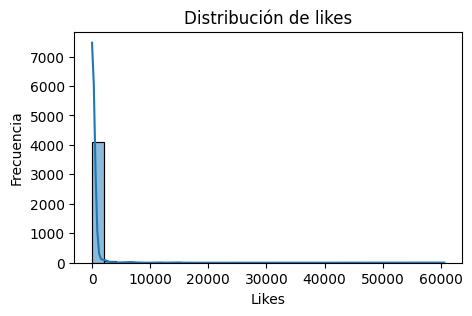

In [15]:
# Análisis exploratorio de datos de Arevalo
#Mostramos las primeras filas del DataFrame 
print(dataArevalo.head())

# Resumen estadístico de las columnas numéricas
print(dataArevalo.describe())

# Visualización de la distribución de algunas variables
# Histograma de columna 'likeCount'
plt.figure(figsize=(5, 3))
sns.histplot(dataArevalo['likeCount'], bins=30, kde=True)
plt.title('Distribución de likes')
plt.xlabel('Likes')
plt.ylabel('Frecuencia')
plt.show()

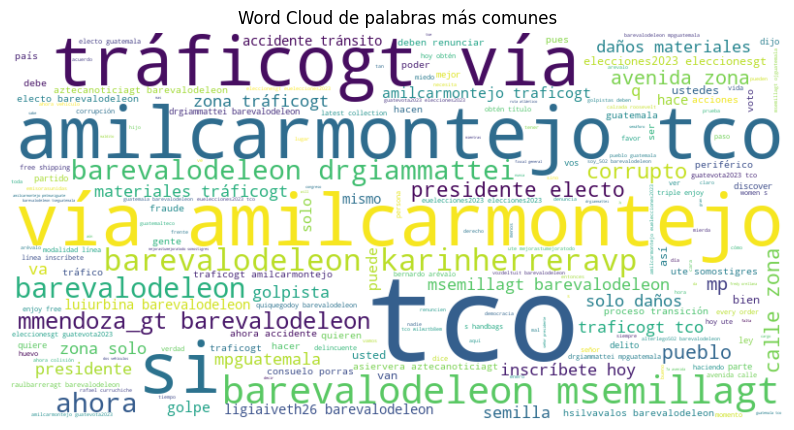

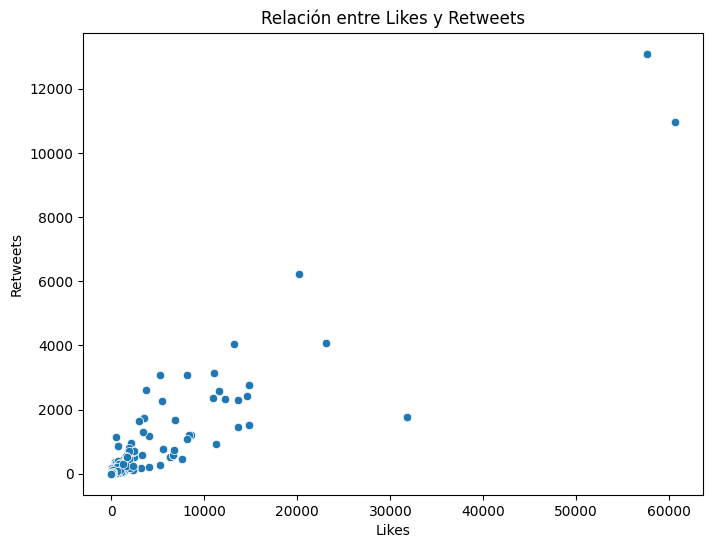

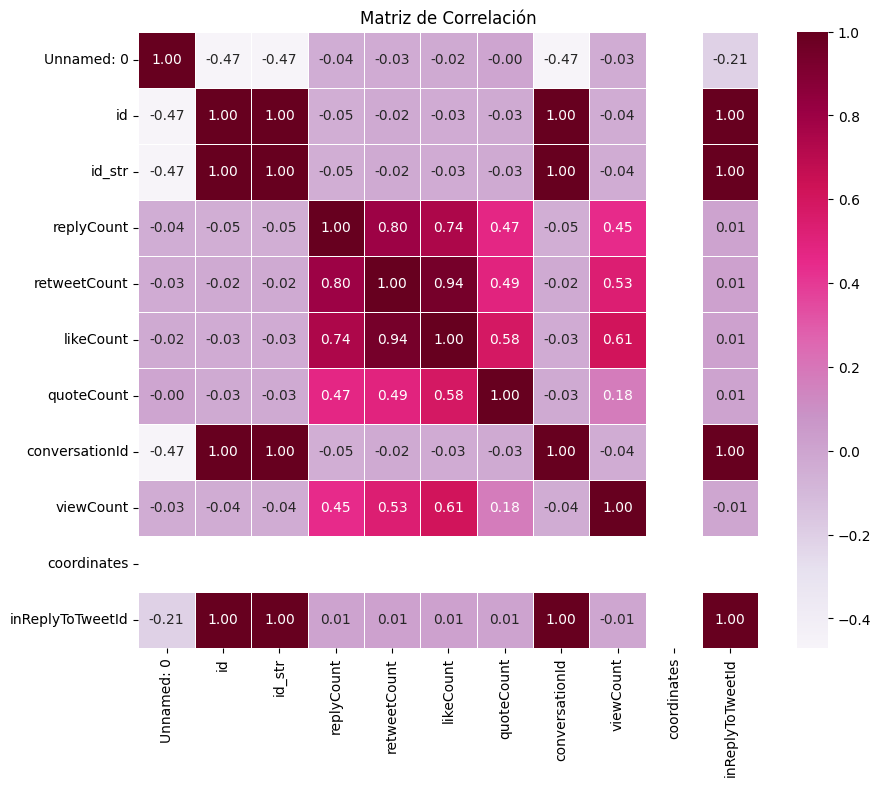

In [21]:
# Visualización de la distribución de texto preprocesado
# Usar columna 'textA_preprocesado'para mostrar las palabras más comunes
text = ' '.join(dataArevalo['textA_preprocesado'])
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)
# Graficar
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud de palabras más comunes')
plt.axis('off')
plt.show()

# Visualización de la relación entre dos variables (scatter plot)
# Relación entre 'likeCount' y 'retweetCount'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataArevalo, x='likeCount', y='retweetCount')
plt.title('Relación entre Likes y Retweets')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.show()

# Identificar las columnas no numéricas
non_numeric_columns = dataArevalo.select_dtypes(exclude=['number']).columns

# Filtrar solo las columnas numéricas
numeric_data = dataArevalo.drop(columns=non_numeric_columns)

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = numeric_data.corr()

# Ahora puedes trazar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuRd', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


------ Análisis exploratrio de Sandra -------

   Unnamed: 0                   id               id_str  \
0           0  1701686249797345422  1701686249797345422   
1           1  1701686065361215632  1701686065361215632   
2           2  1701176209076609121  1701176209076609121   
3           3  1701684889081307215  1701684889081307215   
4           4  1701684719815970972  1701684719815970972   

                                                 url  \
0  https://twitter.com/Yeya16155804/status/170168...   
1  https://twitter.com/Palomin17772524/status/170...   
2  https://twitter.com/iRizhao/status/17011762090...   
3  https://twitter.com/_awskl/status/170168488908...   
4  https://twitter.com/Mr_andrew89/status/1701684...   

                        date  \
0  2023-09-12 19:56:32+00:00   
1  2023-09-12 19:55:48+00:00   
2  2023-09-11 10:09:49+00:00   
3  2023-09-12 19:51:07+00:00   
4  2023-09-12 19:50:27+00:00   

                                                user lang  \
0  {'id': 1213902343311245313, 'id_str': '1213902...  

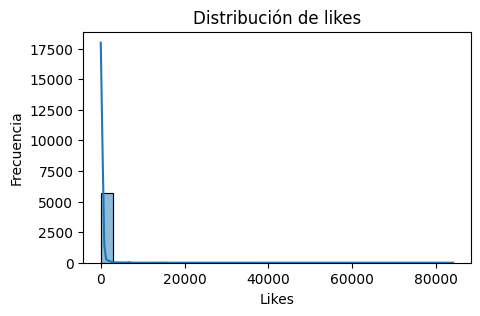

In [19]:
# Análisis exploratorio de datos de Sandra
#Mostramos las primeras filas del DataFrame 
print(dataSandra.head())

# Resumen estadístico de las columnas numéricas
print(dataSandra.describe())

# Visualización de la distribución de algunas variables
# Histograma de columna 'likeCount'
plt.figure(figsize=(5, 3))
sns.histplot(dataSandra['likeCount'], bins=30, kde=True)
plt.title('Distribución de likes')
plt.xlabel('Likes')
plt.ylabel('Frecuencia')
plt.show()

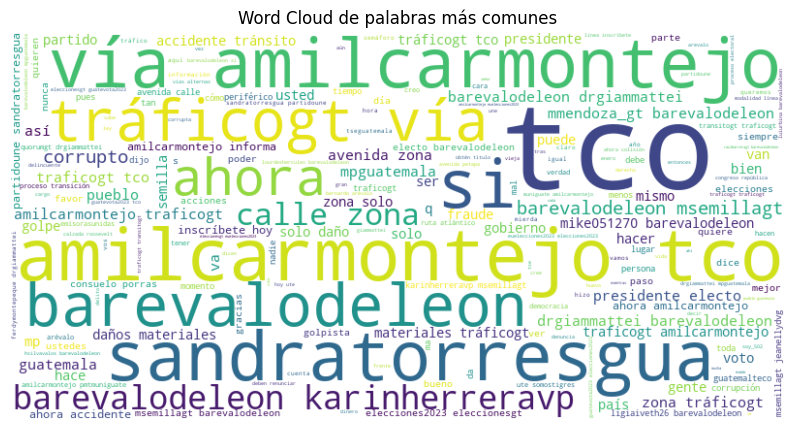

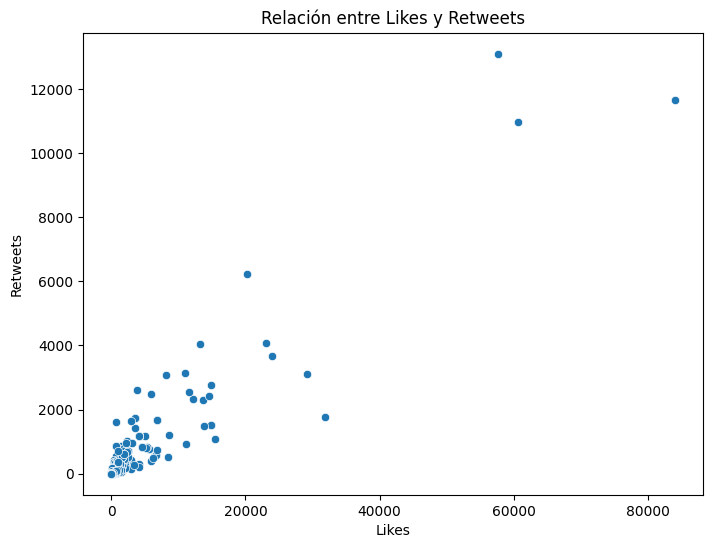

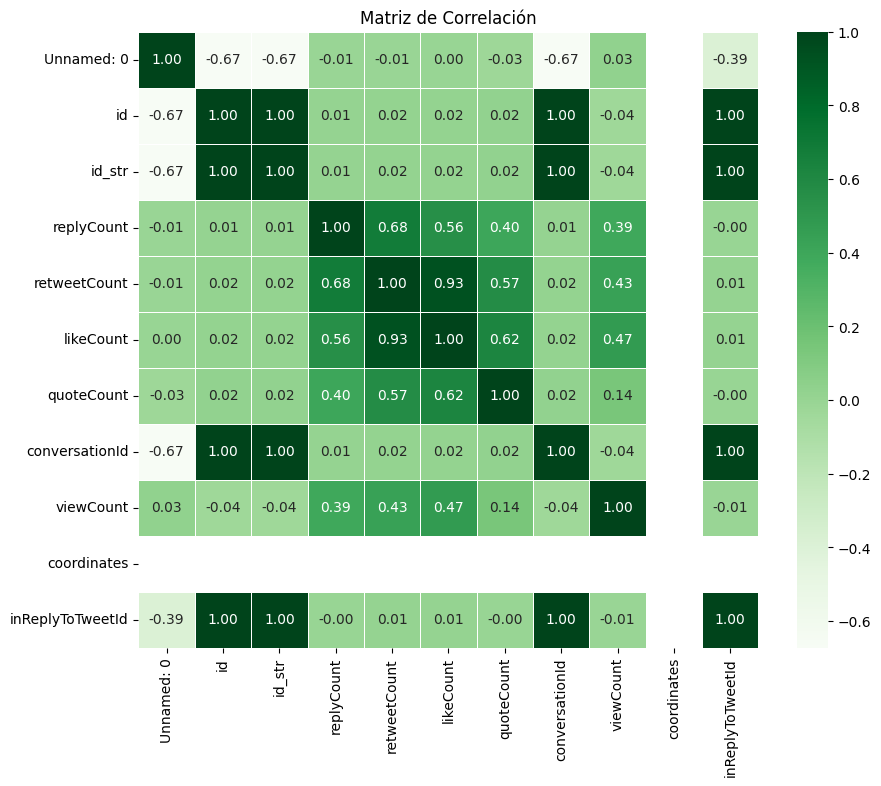

In [22]:
# Visualización de la distribución de texto preprocesado
# Usar columna 'textA_preprocesado'para mostrar las palabras más comunes
text = ' '.join(dataSandra['textS_preprocesado'])
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)
# Graficar
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud de palabras más comunes')
plt.axis('off')
plt.show()

# Visualización de la relación entre dos variables (scatter plot)
# Relación entre 'likeCount' y 'retweetCount'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataSandra, x='likeCount', y='retweetCount')
plt.title('Relación entre Likes y Retweets')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.show()

# Identificar las columnas no numéricas
non_numeric_columns = dataSandra.select_dtypes(exclude=['number']).columns

# Filtrar solo las columnas numéricas
numeric_data = dataSandra.drop(columns=non_numeric_columns)

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = numeric_data.corr()

# Ahora puedes trazar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


------ Análisis exploratorio Trafico ------

   Unnamed: 0                   id               id_str  \
0           0  1701654244858679742  1701654244858679742   
1           1  1701651855212691764  1701651855212691764   
2           2  1701348453916311903  1701348453916311903   
3           3  1701995859229958189  1701995859229958189   
4           4  1701216420997017888  1701216420997017888   

                                                 url  \
0  https://twitter.com/EmisorasUnidas/status/1701...   
1  https://twitter.com/amilcarmontejo/status/1701...   
2  https://twitter.com/edgarduarteagui/status/170...   
3  https://twitter.com/DrDavidCabrera/status/1701...   
4  https://twitter.com/EmisorasUnidas/status/1701...   

                        date  \
0  2023-09-12 17:49:21+00:00   
1  2023-09-12 17:39:52+00:00   
2  2023-09-11 21:34:15+00:00   
3  2023-09-13 16:26:49+00:00   
4  2023-09-11 12:49:36+00:00   

                                                user lang  \
0  {'id': 40256008, 'id_str': '40256008', 'url': ...  

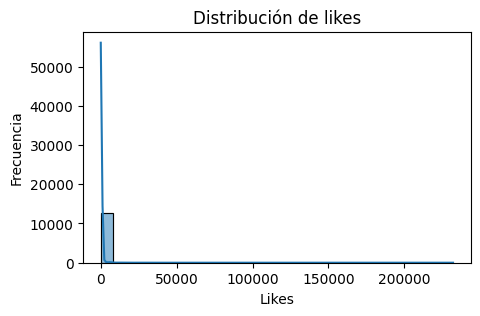

In [23]:
# Análisis exploratorio de datos de Sandra
#Mostramos las primeras filas del DataFrame 
print(dataTrafico.head())

# Resumen estadístico de las columnas numéricas
print(dataTrafico.describe())

# Visualización de la distribución de algunas variables
# Histograma de columna 'likeCount'
plt.figure(figsize=(5, 3))
sns.histplot(dataTrafico['likeCount'], bins=30, kde=True)
plt.title('Distribución de likes')
plt.xlabel('Likes')
plt.ylabel('Frecuencia')
plt.show()

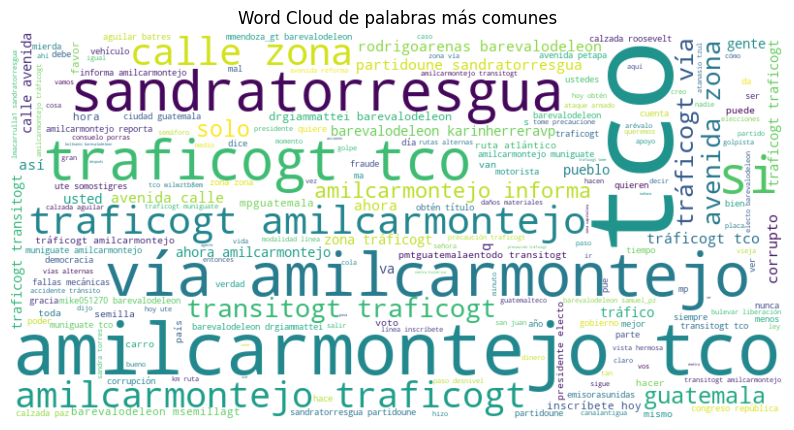

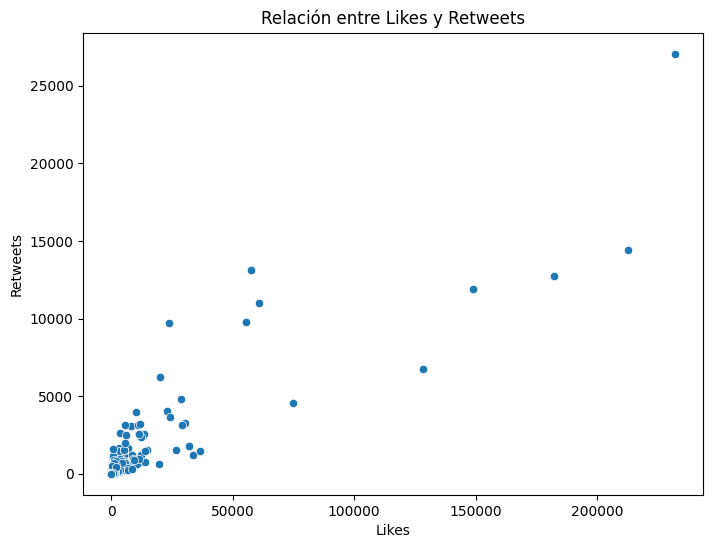

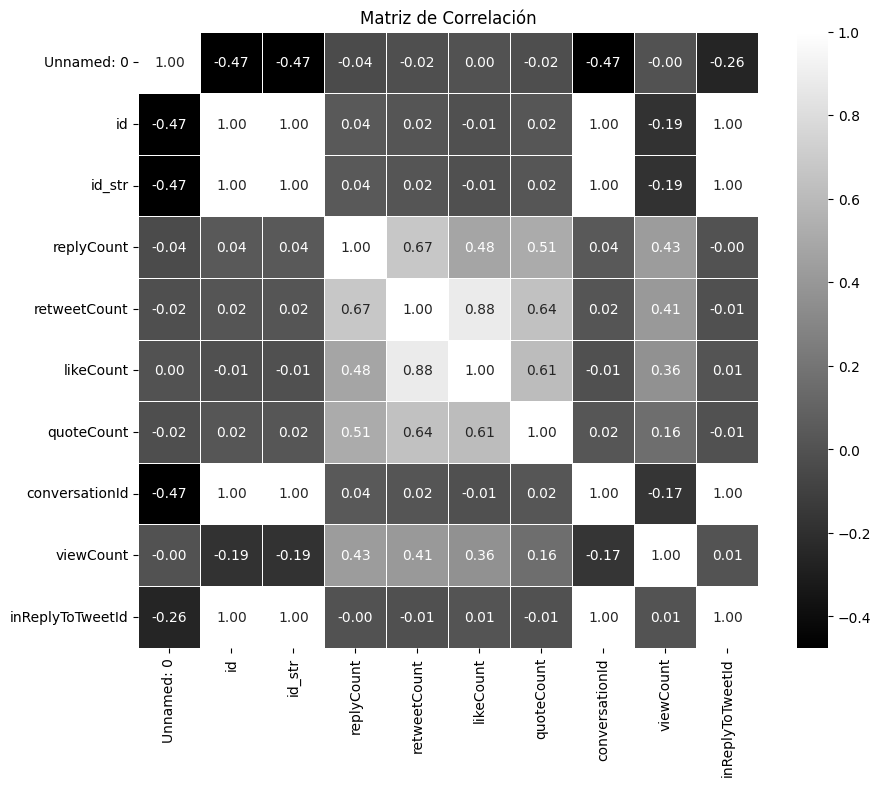

In [24]:
# Visualización de la distribución de texto preprocesado
# Usar columna 'textA_preprocesado'para mostrar las palabras más comunes
text = ' '.join(dataTrafico['textT_preprocesado'])
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)
# Graficar
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud de palabras más comunes')
plt.axis('off')
plt.show()

# Visualización de la relación entre dos variables (scatter plot)
# Relación entre 'likeCount' y 'retweetCount'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataTrafico, x='likeCount', y='retweetCount')
plt.title('Relación entre Likes y Retweets')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.show()

# Identificar las columnas no numéricas
non_numeric_columns = dataTrafico.select_dtypes(exclude=['number']).columns

# Filtrar solo las columnas numéricas
numeric_data = dataTrafico.drop(columns=non_numeric_columns)

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = numeric_data.corr()

# Ahora puedes trazar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='gray', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


5. Responda las preguntas que se le hacen en los ejercicios, las respuestas deben estar basadas en 
datos. 


6. Llegue a conclusiones sobre lo que descubrió.

Problema 1:

Extraiga los datos relacionados con el tráfico en la ciudad de Guatemala, puede utilizar cualquier
red social, a la que se tenga acceso, y pueden extraerse datos de varias. Por ejemplo, si extrae datos
de twitter (ahora X) podría utilizar los hashtag #TraficoGT, #TransitoGT o @amilcarmontejo . Explore
los datos que extraiga y descubra conocimiento, tendencias y elementos interesantes. ¿Cómo ha
venido a complicar el tráfico en toda la ciudad la época de lluvia?¿El socavón de zona 5 ha tenido
un impacto importante en el tráfico de la zona de la universidad?


Problema 2:

Extraiga los datos que le permitan determinar la popularidad de Bernardo Arévalo y de Sandra
Torres, puede utilizar cualquier red social, a la que se tenga acceso, y pueden extraerse datos de
varias. Explore los datos que extraiga y descubra conocimiento, tendencias y elementos
interesantes. ¿La opinión pública de cada uno de los candidatos es en su mayoría positiva o
negativa? Puede usar comentarios para responderse esta pregunta. ¿Encontró algún
influencer?¿Cómo describiría la estructura de la red de cada uno de los candidatos, centralizada o
distribuida?¿Fue durante su campaña la red social un aspecto importante para influir en la decisión
de los guatemaltecos?